In [6]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
from scipy.stats import linregress
from citipy import citipy

#Get api key from config file
from config import api_key

## Get list of random cities by reverse geocoding

In [113]:
#Create an empty list of cities
cities = []

#Get random arrays latitudes and longitudes 
latitudes = np.random.uniform(-90, 90, 1500)
longitudes = np.random.uniform(-180, 180, 1500)

#Zip the lists of latitudes and longitudes to create coordinates
for lat, long in zip(latitudes, longitudes):
    
    #Use citipy to use coordinates to find closest city
    city = citipy.nearest_city(lat, long).city_name
    
    #Add unique city to cities list
    if city not in cities:
        cities.append(city)

#Check that number of cities is greater than 500
print(f"Number of cities in list: {len(cities)}")

Number of cities in list: 594


In [115]:
#Create a query from the openweathermap api
url = "http://api.openweathermap.org/data/2.5/weather?"
api = "appid=" + api_key
fah = "&units=imperial"

#Create empty lists for latitude, longitude, temperature, humidity, cloudiness, wind speed, cities, countries, date
actlat = []
actlon = []
tempf = []
humid = []
cloud = []
winds = []
cityname = []
country = []
date = []
counter = 1

for city in cities:
    query_url = f"{url}{api}{fah}&q={city}"
    city_json = requests.get(query_url).json()

    #Checks if city is a valid query
    if city_json['cod'] == 200:
        print(f"Making call number {counter} for {city}.")
        actlat.append(city_json['coord']['lat'])
        actlon.append(city_json['coord']['lon'])
        tempf.append(city_json['main']['temp_max'])
        humid.append(city_json['main']['humidity'])
        cloud.append(city_json['clouds']['all'])
        winds.append(city_json['wind']['speed'])
        cityname.append(city_json['name'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
    else:
        print(f"Making call number {counter} for {city} - Not Found.")
    
    #Increase counter
    counter += 1
    
    #Use sleep function to pause api calls as number per minute is limited to 60
    time.sleep(1)

#Check number of cities is still greater than 500
print(f"Number of cities in list: {len(cityname)}")

Making call number 1 for faya.
Making call number 2 for juneau.
Making call number 3 for bengkulu - Not Found.
Making call number 4 for aswan.
Making call number 5 for albany.
Making call number 6 for ust-omchug.
Making call number 7 for castro.
Making call number 8 for kashi - Not Found.
Making call number 9 for ferrol.
Making call number 10 for kaitangata.
Making call number 11 for saint-augustin.
Making call number 12 for cape town.
Making call number 13 for port alfred.
Making call number 14 for avarua.
Making call number 15 for kapaa.
Making call number 16 for asau - Not Found.
Making call number 17 for tema.
Making call number 18 for geraldton.
Making call number 19 for mangrol.
Making call number 20 for hailar.
Making call number 21 for atuona.
Making call number 22 for khatanga.
Making call number 23 for goderich.
Making call number 24 for new norfolk.
Making call number 25 for yellowknife.
Making call number 26 for punta arenas.
Making call number 27 for sfantu gheorghe.
Makin

Making call number 215 for kasempa.
Making call number 216 for zainsk.
Making call number 217 for ayagoz.
Making call number 218 for svirstroy.
Making call number 219 for victoria.
Making call number 220 for kegayli - Not Found.
Making call number 221 for madang.
Making call number 222 for quatre cocos.
Making call number 223 for cayenne.
Making call number 224 for conceicao do araguaia.
Making call number 225 for mar del plata.
Making call number 226 for kruisfontein.
Making call number 227 for tirschenreuth.
Making call number 228 for krasnogorsk.
Making call number 229 for codrington.
Making call number 230 for venice.
Making call number 231 for warqla - Not Found.
Making call number 232 for port shepstone.
Making call number 233 for norman wells.
Making call number 234 for bambous virieux.
Making call number 235 for kavieng.
Making call number 236 for kodiak.
Making call number 237 for prince rupert.
Making call number 238 for hasaki.
Making call number 239 for andenes - Not Found.

Making call number 427 for kargasok.
Making call number 428 for nouakchott.
Making call number 429 for benguela.
Making call number 430 for bokspits - Not Found.
Making call number 431 for phonhong.
Making call number 432 for porto novo.
Making call number 433 for addi ugri - Not Found.
Making call number 434 for husavik.
Making call number 435 for porto velho.
Making call number 436 for saryshagan - Not Found.
Making call number 437 for novonikolayevskiy.
Making call number 438 for lafiagi.
Making call number 439 for pangkalanbuun.
Making call number 440 for talnakh.
Making call number 441 for nizhniy tsasuchey.
Making call number 442 for buala.
Making call number 443 for chumikan.
Making call number 444 for grammichele.
Making call number 445 for oksfjord.
Making call number 446 for orangeburg.
Making call number 447 for thinadhoo.
Making call number 448 for adrar.
Making call number 449 for praia.
Making call number 450 for elat.
Making call number 451 for matay.
Making call number 

## Save list of cities

In [116]:
#Create dictionary for dataframe
city_dict = {
    'City': cityname,
    'Country': country,
    'Date': date,
    'Latitude': actlat,
    'Longitude': actlon,
    'High Temperature (F)': tempf,
    'Humidity': humid,
    'Cloudiness': cloud,
    'Wind Speed': winds
}

#Create dataframe to save data to csv
city_df = pd.DataFrame(city_dict)
city_df.to_csv('cities.csv', index=False)

## Create plots X vs. Latitude

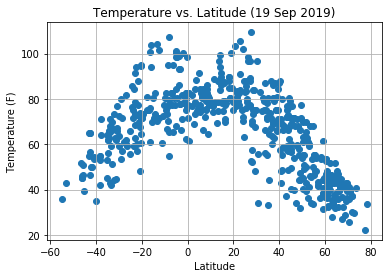

In [168]:
#Plot of Temperature vs. Latitude for list of cities
plt.scatter(city_df['Latitude'], city_df['High Temperature (F)'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs. Latitude (19 Sep 2019)')
plt.grid()
plt.savefig("tvl.png")
plt.show()

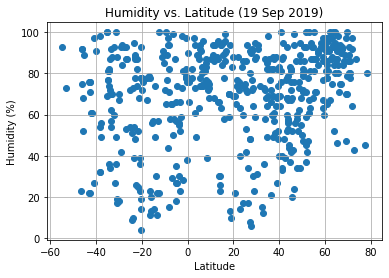

In [169]:
#Plot of Humidity (%) vs Latitude for list of cities
plt.scatter(city_df['Latitude'], city_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs. Latitude (19 Sep 2019)')
plt.grid()
plt.savefig("hvl.png")
plt.show()

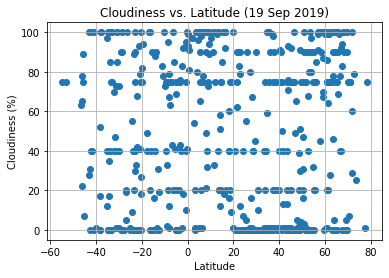

In [170]:
#Plot of Cloudiness (%) vs Latitude for list of cities
plt.scatter(city_df['Latitude'], city_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs. Latitude (19 Sep 2019)')
plt.grid()
plt.savefig("cvl.png")
plt.show()

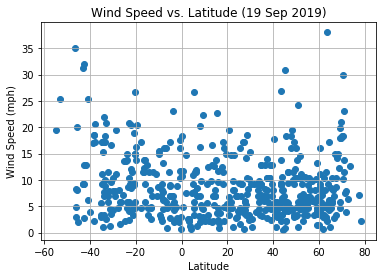

In [171]:
#Plot of Wind Speed (mph) vs Latitude for list of cities
plt.scatter(city_df['Latitude'], city_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs. Latitude (19 Sep 2019)')
plt.grid()
plt.savefig("wsvl.png")
plt.show()

## Plot Linear Regressions after spliting hemispheres

In [121]:
#Split cities into Northern and Southern Hemisphere (Lat 0 will be in Northern)
nh_df = city_df[city_df['Latitude'] >= 0].reset_index(drop=True)
sh_df = city_df[city_df['Latitude'] < 0].reset_index(drop=True)

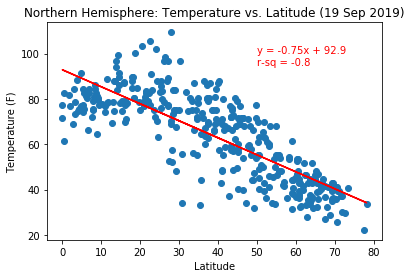

In [173]:
#Plot of Temperature vs. Latitude for Northern Hemisphere cities with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df['Latitude'], nh_df['High Temperature (F)'])
regress_values = nh_df['Latitude'] * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rsquared = f"r-sq = {str(round(rvalue,2))}"

plt.scatter(nh_df['Latitude'], nh_df['High Temperature (F)'])
plt.plot(nh_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (50,100), c='r')
plt.annotate(rsquared, (50, 95), c='r')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere: Temperature vs. Latitude (19 Sep 2019)')
plt.savefig("tvl_north.png")
plt.show()

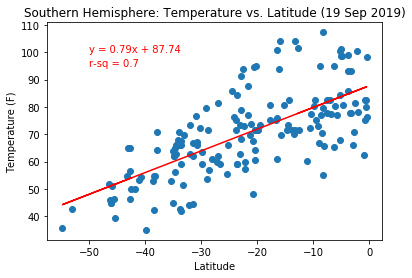

In [174]:
#Plot of Temperature vs. Latitude for Southern Hemisphere cities with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df['Latitude'], sh_df['High Temperature (F)'])
regress_values = sh_df['Latitude'] * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rsquared = f"r-sq = {str(round(rvalue,2))}"

plt.scatter(sh_df['Latitude'], sh_df['High Temperature (F)'])
plt.plot(sh_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (-50, 100), c='r')
plt.annotate(rsquared, (-50, 95), c='r')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere: Temperature vs. Latitude (19 Sep 2019)')
plt.savefig("tvl_south.png")
plt.show()

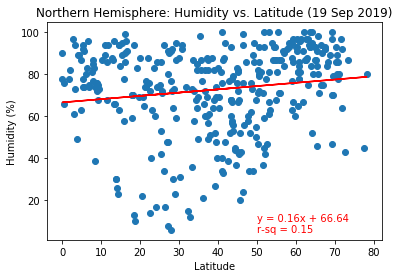

In [175]:
#Plot of Humidity vs. Latitude for Northern Hemisphere cities with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df['Latitude'], nh_df['Humidity'])
regress_values = nh_df['Latitude'] * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rsquared = f"r-sq = {str(round(rvalue,2))}"

plt.scatter(nh_df['Latitude'], nh_df['Humidity'])
plt.plot(nh_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (50,10), c='r')
plt.annotate(rsquared, (50, 5), c='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Humidity vs. Latitude (19 Sep 2019)')
plt.savefig("hvl_north.png")
plt.show()

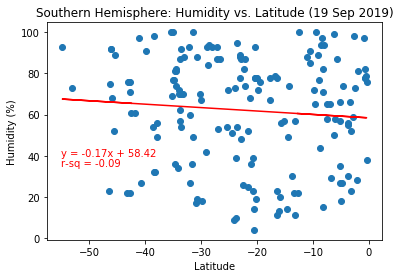

In [178]:
#Plot of Humidity vs. Latitude for Southern Hemisphere cities with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df['Latitude'], sh_df['Humidity'])
regress_values = sh_df['Latitude'] * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rsquared = f"r-sq = {str(round(rvalue,2))}"

plt.scatter(sh_df['Latitude'], sh_df['Humidity'])
plt.plot(sh_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (-55, 40), c='r')
plt.annotate(rsquared, (-55, 35), c='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude (19 Sep 2019)')
plt.savefig("hvl_south.png")
plt.show()

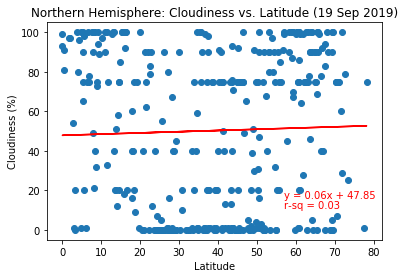

In [179]:
#Plot of Cloudiness vs. Latitude for Northern Hemisphere cities with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df['Latitude'], nh_df['Cloudiness'])
regress_values = nh_df['Latitude'] * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rsquared = f"r-sq = {str(round(rvalue,2))}"

plt.scatter(nh_df['Latitude'], nh_df['Cloudiness'])
plt.plot(nh_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (57,16), c='r')
plt.annotate(rsquared, (57, 11), c='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude (19 Sep 2019)')
plt.savefig("cvl_north.png")
plt.show()

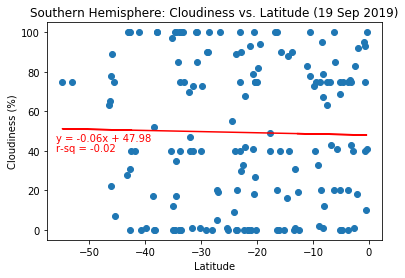

In [177]:
#Plot of Cloudiness vs. Latitude for Southern Hemisphere cities with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df['Latitude'], sh_df['Cloudiness'])
regress_values = sh_df['Latitude'] * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rsquared = f"r-sq = {str(round(rvalue,2))}"

plt.scatter(sh_df['Latitude'], sh_df['Cloudiness'])
plt.plot(sh_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (-56, 45), c='r')
plt.annotate(rsquared, (-56, 40), c='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude (19 Sep 2019)')
plt.savefig("cvl_south.png")
plt.show()

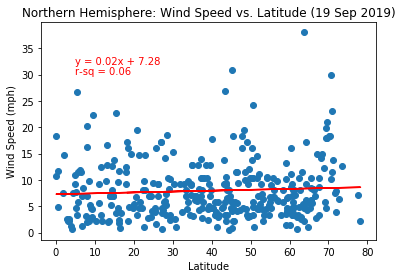

In [180]:
#Plot of Wind Speed vs. Latitude for Northern Hemisphere cities with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_df['Latitude'], nh_df['Wind Speed'])
regress_values = nh_df['Latitude'] * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rsquared = f"r-sq = {str(round(rvalue,2))}"

plt.scatter(nh_df['Latitude'], nh_df['Wind Speed'])
plt.plot(nh_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (5,32), c='r')
plt.annotate(rsquared, (5,30), c='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude (19 Sep 2019)')
plt.savefig("wsvl_north.png")
plt.show()

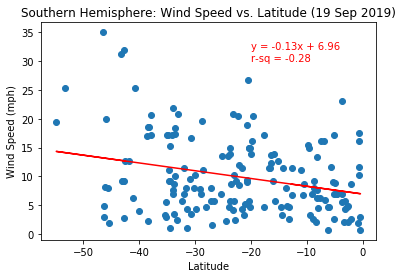

In [176]:
#Plot of Wind Speed vs. Latitude for Southern Hemisphere cities with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_df['Latitude'], sh_df['Wind Speed'])
regress_values = sh_df['Latitude'] * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rsquared = f"r-sq = {str(round(rvalue,2))}"

plt.scatter(sh_df['Latitude'], sh_df['Wind Speed'])
plt.plot(sh_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (-20, 32), c='r')
plt.annotate(rsquared, (-20, 30), c='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude (19 Sep 2019)')
plt.savefig("wsvl_south.png")
plt.show()